In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from lmfit.lineshapes import *
from lmfit.models import GaussianModel, LorentzianModel, ExponentialModel, PolynomialModel, VoigtModel
from scipy import signal as sig
from scipy import optimize as opt
import peakutils

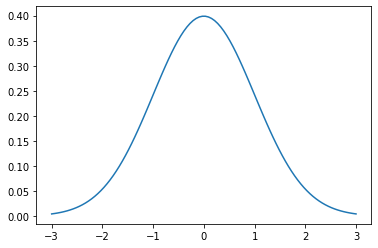

In [2]:
# Define basic gaussian function: A = amplitude, mu = mean, sigma = standard deviation
def g(x, A, μ, σ):
    return A / (σ * math.sqrt(2 * math.pi)) * np.exp(-(x-μ)**2 / (2*σ**2))

# Generate example data and plot gaussian function
x = np.linspace(-3, 3, 100)
y = g(x, 1, 0, 1) 
fig, ax = plt.subplots()
ax.plot(x, g(x, 1, 0, 1))

In [3]:
# Load the pre-built gaussian model found with the lmfit module.
model = GaussianModel()
pars = model.guess(y, x=x)  #The parameters for the gaussian module (amplitude, mean, sigma) are guessed by input
out = model.fit(y, pars, x=x) # Fit of gaussian model to input data

In [4]:
print(out.fit_report(min_correl = 0.25)) # Fit Report

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 2.8257e-31
    reduced chi-square = 2.9131e-33
    Akaike info crit   = -7488.65465
    Bayesian info crit = -7480.83914
##  Warning: uncertainties could not be estimated:
    center:     at initial value
[[Variables]]
    amplitude:  1.00000000 (init = 1.326374)
    center:     7.0119e-17 (init = 7.011935e-17)
    sigma:      1.00000000 (init = 1.121212)
    fwhm:       2.35482000 == '2.3548200*sigma'
    height:     0.39894230 == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'


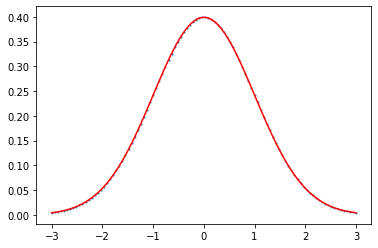

In [5]:
# Plot of original data and gaussian model fit
plt.scatter(x, y, 1)
plt.plot(x, out.best_fit, color = 'red')
plt.show()

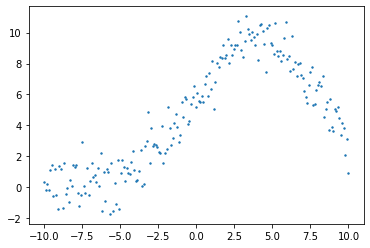

In [6]:
# Generate a gaussian function with a random spread in data points
A = 100.0 # intensity
μ = 4.0  # mean
σ = 4.0 # peak width
n = 200
x = np.linspace(-10, 10, n)
y = g(x, A, μ, σ) + np.random.randn(n)
fig, ax = plt.subplots()
ax.scatter(x, y, s=2)

In [7]:
# Generate gaussian model based on initial guess from the data
model1 = GaussianModel()
pars1 = model1.guess(y, x=x)
out1 = model1.fit(y, pars1, x=x)
print(out1.fit_report(min_correl  = 25))

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 200
    # variables        = 3
    chi-square         = 181.606176
    reduced chi-square = 0.92185876
    Akaike info crit   = -13.2953788
    Bayesian info crit = -3.40042667
[[Variables]]
    amplitude:  97.0542660 +/- 1.56379969 (1.61%) (init = 238.8328)
    center:     4.01646999 +/- 0.07164041 (1.78%) (init = 3.940409)
    sigma:      3.98595652 +/- 0.07888319 (1.98%) (init = 6.231156)
    fwhm:       9.38621014 +/- 0.18575572 (1.98%) == '2.3548200*sigma'
    height:     9.71386714 +/- 0.14445265 (1.49%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'


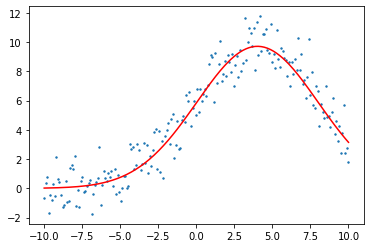

In [8]:
A = 100.0 # intensity
μ = 4.0  # mean
σ = 4.0 # peak width
n = 200
x = np.linspace(-10, 10, n)
y = g(x, A, μ, σ) + np.random.randn(n)
fig, ax = plt.subplots()
ax.scatter(x, y, s=2)
plt.plot(x, out1.best_fit, color = 'red') # Plot of best fit

In [9]:
# Generation of random set of input data
np.random.seed(0)
x = np.linspace(0, 20.0, 601)

# Generate a multipeak function consisting of gaussian and lorentzian peaks
data = (gaussian(x, 21, 6.1, 1.2) + gaussian(x, 10, 9.6, 1.3) + lorentzian(x, 32, 15, 1) +
        np.random.normal(scale=0.1, size=x.size))

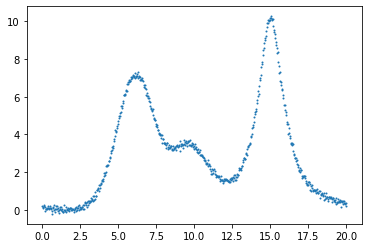

In [10]:
plt.scatter(x, data, 1)

In [11]:
# Create models

gauss_1 = GaussianModel(prefix = 'g1_')  #First Gaussian Model using input data for initial parameter guess
par = gauss_1.guess(data, x = x)

gauss_2 = GaussianModel(prefix = 'g2_') #Second Gaussian Model updating parameters from first fit
par.update(gauss_2.make_params())

par['g2_center'].set(value = 10.0, min = 7.5, max = 12.0) # Setting mean for second gaussian with min/max range
par['g2_sigma'].set(value = 4, min = 0.1) # Setting deviation for second gaussian with min value limit
par['g2_amplitude'].set(value = 20, min = 1) # Setting amplitude for second gaussian with min value limit

lorentzian = LorentzianModel(prefix = 'l1_') # Lorentzian model
par.update(lorentzian.make_params())

par['l1_center'].set(value = 15.0, min = 13.5, max = 18.0) # Initial guess for the mean, amplitude and sigma
par['l1_sigma'].set(value = 4.0, min = 1)
par['l1_amplitude'].set(value = 40, min = 9.0)

In [12]:
model = gauss_1 + gauss_2 + lorentzian  # Combined model for the data
out = model.fit(data, par, x = x) # Best fit of input data
print(out.fit_report())

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(lorentzian, prefix='l1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7471
    # data points      = 601
    # variables        = 9
    chi-square         = 6.96927973
    reduced chi-square = 0.01177243
    Akaike info crit   = -2660.70692
    Bayesian info crit = -2621.11956
##  Warning: uncertainties could not be estimated:
    l1_sigma:      at boundary
[[Variables]]
    g1_amplitude: -7500.64092 (init = 171.0675)
    g1_center:     7.73015157 (init = 10.5062)
    g1_sigma:      1.46423496 (init = 5.45)
    g1_fwhm:       3.44800977 == '2.3548200*g1_sigma'
    g1_height:    -2043.60845 == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  7531.66384 (init = 20)
    g2_center:     7.72789536 (init = 10)
    g2_sigma:      1.46754599 (init = 4)
    g2_fwhm:       3.45580664 == '2.3548200*g2_sigma'
    g2_height:     2047.43110 == '0.398

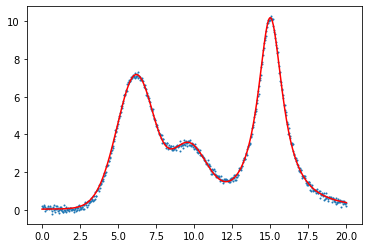

In [13]:
plt.scatter(x, data, 1)
plt.plot(x, out.best_fit, color = 'red')

In [14]:
# Load silicon sample
csv  = pd.read_csv('Phys-PK1_Si.csv', header = 29).to_numpy()

In [15]:
Si_x_data = csv[:, 0]
Si_y_data = csv[:, 1]
print(len(Si_x_data))
print(len(Si_y_data))

3529
3529


In [16]:
def smooth(data, win_size, polynomial):  # win_size = no. of data points of subset, polynomial = degree of polynomail
    smoothed_data = sig.savgol_filter(data, win_size, polynomial)
    return smoothed_data

y_smooth = smooth(Si_y_data, 9, 1)

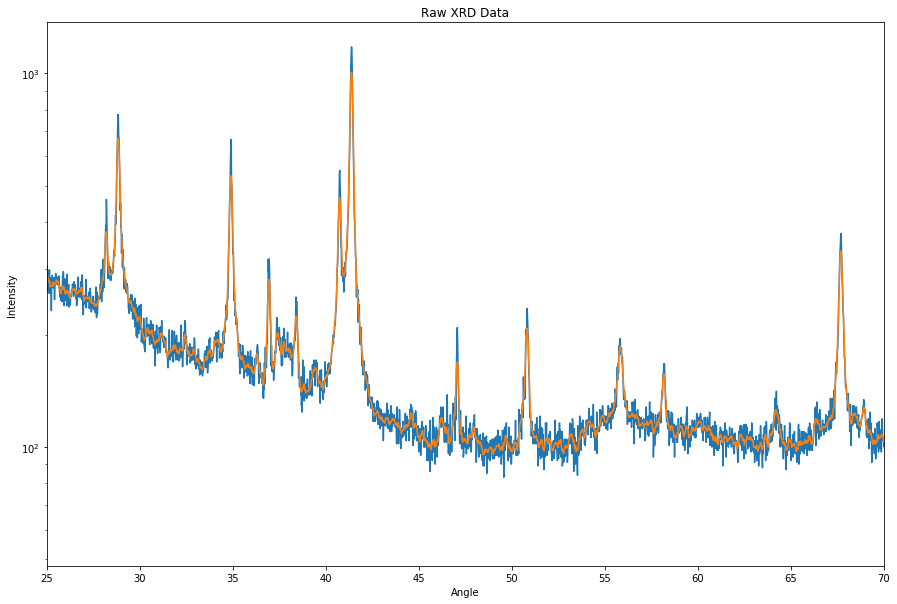

In [17]:
plt.subplots(figsize=(15, 10))
plt.plot(Si_x_data, Si_y_data)
plt.plot(Si_x_data, y_smooth)
plt.yscale('log')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Raw XRD Data')
plt.xlim(25, 70)
plt.show()

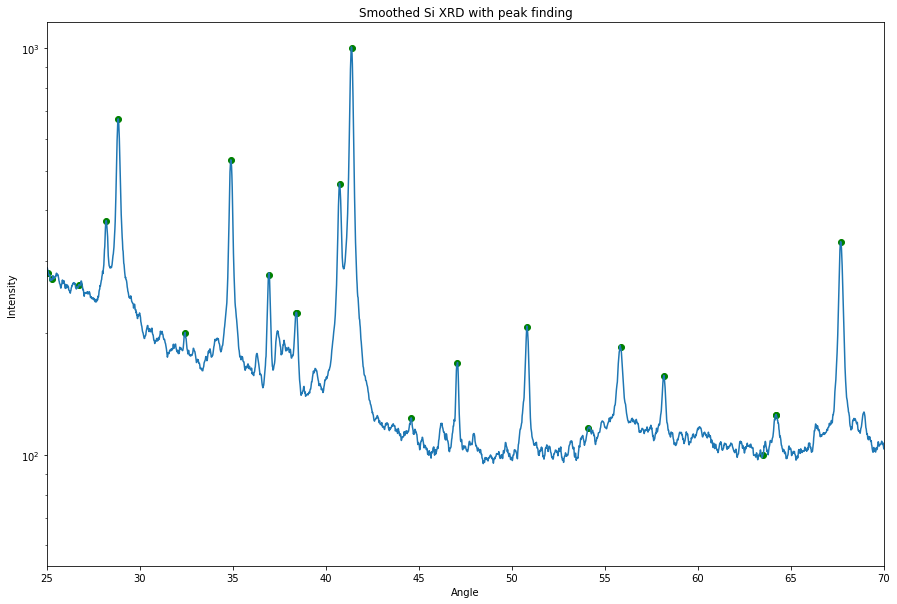

In [18]:
# Find peaks within data: adjust widths, gap_thresh, min_snr and noise_perc to achive optimum number of points

peak_indicies = sig.find_peaks_cwt(y_smooth, widths = (4, 15), gap_thresh = 4, min_snr = 1.7, noise_perc = 10)
quantile = np.quantile(Si_y_data, .60)
mean = np.mean(Si_y_data)

plt.subplots(figsize=(15, 10))
plt.plot(Si_x_data , y_smooth)
plt.scatter(Si_x_data[peak_indicies], y_smooth[peak_indicies], color = 'green')
plt.yscale('log')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Smoothed Si XRD with peak finding')
plt.xlim(25, 70)
plt.show()

In [19]:
data_peaks = pd.DataFrame([Si_x_data[peak_indicies], y_smooth[peak_indicies]])
data_peaks = data_peaks.transpose()
data_peaks.columns = ['X_data', 'Y_data']

print(data_peaks.head())

   X_data      Y_data
0  25.083  280.222222
1  25.270  270.777778
2  26.749  262.111111
3  28.194  376.777778
4  28.840  669.444444


In [23]:
print(quantile)
print(mean)
    

120.0
141.24681212808161


In [28]:
df = pd.read_csv('Phys-PK1_Si.csv', header = 29)
print(df.head())

    Angle  Intensity
0  25.015      306.0
1  25.032      267.0
2  25.049      289.0
3  25.066      261.0
4  25.083      288.0


[[Model]]
    (Model(lorentzian, prefix='l1_') + Model(lorentzian, prefix='l2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 307
    # data points      = 470
    # variables        = 6
    chi-square         = 1991691.40
    reduced chi-square = 4292.43837
    Akaike info crit   = 3937.32818
    Bayesian info crit = 3962.24458
[[Variables]]
    l1_amplitude:  269.508565 +/- 141.992465 (52.69%) (init = 500)
    l1_center:     25.2228051 +/- 0.17574111 (0.70%) (init = 28)
    l1_sigma:      0.70060687 +/- 0.30894313 (44.10%) (init = 4)
    l1_fwhm:       1.40121373 +/- 0.61788627 (44.10%) == '2.0000000*l1_sigma'
    l1_height:     122.447051 +/- 18.9285929 (15.46%) == '0.3183099*l1_amplitude/max(2.220446049250313e-16, l1_sigma)'
    l2_amplitude:  3370.45738 +/- 226.690318 (6.73%) (init = 900)
    l2_center:     28.6201210 +/- 0.14904254 (0.52%) (init = 28.8)
    l2_sigma:      3.47848898 +/- 0.22273300 (6.40%) (init = 4)
    l2_fwhm:       6.95697796 +/

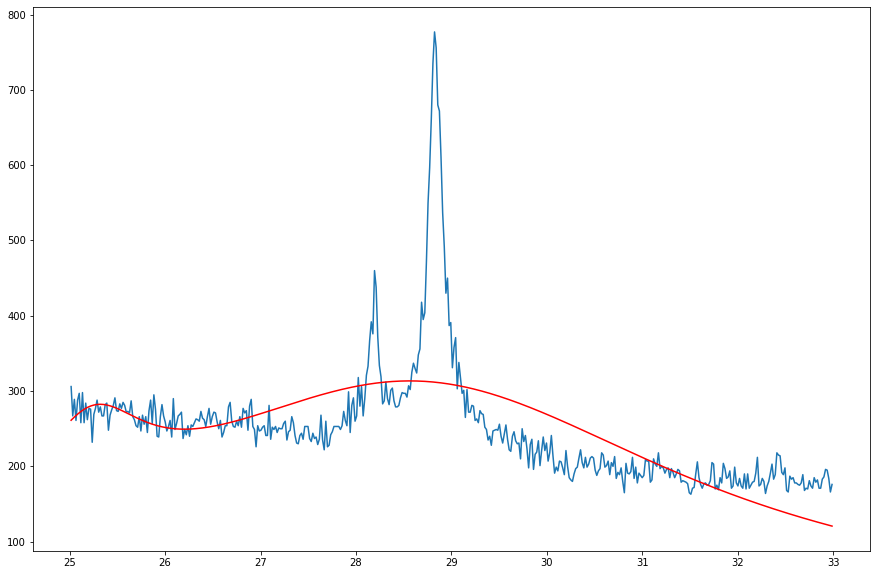

In [55]:
peak_1 = df['Angle'] < 33
peak_1 = df[peak_1]
peak_1 = peak_1.to_numpy()

plt.subplots(figsize = (15, 10))
plt.plot(peak_1[:, 0], peak_1[:, 1])

x1 = peak_1[:, 0]
y1 = peak_1[:, 1]

lorentz_1 = LorentzianModel(prefix = 'l1_')
par = lorentz_1.make_params()
par['l1_center'].set(value = 28.0)
par['l1_sigma'].set(value = 4)
par['l1_amplitude'].set(value = 500)

lorentz_2 = LorentzianModel(prefix = 'l2_')
par.update(lorentz_2.make_params())
par['l2_center'].set(value = 28.8)
par['l2_sigma'].set(value = 4.0)
par['l2_amplitude'].set(value = 900)

model = lorentz_1 + lorentz_2
out = model.fit(y1, par, x=x1)

print(out.fit_report())
plt.plot(x1, out.best_fit, color = 'red')